# Лабораторная работа 3
*********
## Статистические методы обучения. Метод опорных векторов

На этом занятии компьютерного практикума Вы изучите метод опорных векторов (англ. SVM, Support Vector Machine) и примените данный метод для решения задачи классификации различных двумерных наборов данных. В последних публикациях на русском языке метод называется также машинами поддерживающих векторов, или, в более общем смысле, ядерными машинами (англ. Kernel Machine). В методах, основанных на их использовании, предусмотрен эффективный механизм обучения, а сами они позволяют представить сложные, нелинейные функции.   

Ядерные машины превосходят все другие способы распознавания рукописных символов, в частности цифр; кроме того, они быстро находят применение и в других приложениях, особенно в тех, которые отличаются большим количеством входных характеристик. Прежде чем приступить, собственно, к программированию, настоятельно рекомендуется ознакомиться с материалом лекций, а также с дополнительными материалами, имеющими отношение к задачам классификации.


In [3]:
# импортирую все необходимые библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import math
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import svm
import scipy.io

/tmp/ipykernel_42369/325804343.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Часть 1: Загрузка и визуализация данных

Как было сказано выше, Вы будете использовать метод опорных векторов для классификации 2-мерных наборов данных. В ходе работы над упражнением вы изучите собственно метод, а также научитесь использовать с SVM ядро Гаусса.

In [4]:
mat = scipy.io.loadmat('ex3data1.mat')
X = np.array(mat["X"])
y = np.array(mat["y"])

In [5]:
def plotData(X, y):
    # ====================== Ваш код здесь ======================
    # Указание: Реализуйте функцию, которая будет визуализировать набор данных
    
    y = y.ravel()
    
    plt.plot(X[:,0][y == 1], X[:,1][y == 1], "k+", label = 'Positive example')
    plt.plot(X[:,0][y == 0], X[:,1][y == 0], "yo", label = 'Negative example')
    plt.legend()
    plt.show()

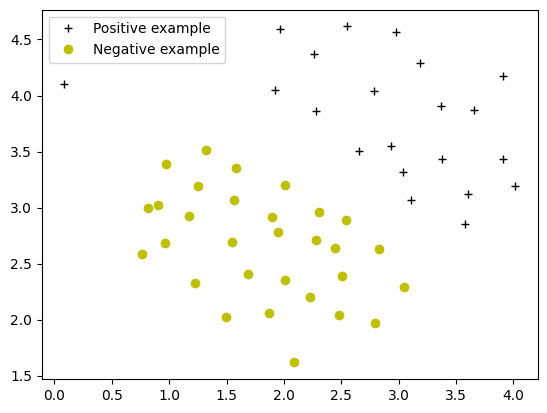

In [6]:
plotData(X, y)

## Часть 2: Обучение линейного классификатора SVM

In [7]:
def svmTrain(X, y, C, kernelFunction, sigma = None, tol=1e-3, max_passes=-1, lambda_reg = None):
    y = y.flatten()

    if kernelFunction == "gaussian_rbf":
        clf = svm.SVC(C = C, kernel="rbf", tol=tol, max_iter=max_passes, verbose=True)
        return clf.fit(gaussianKernelGramMatrix(X,X, sigma), y)

    else:
        clf = svm.SVC(C = C, kernel=kernelFunction, tol=tol, max_iter=max_passes, verbose=True)
        return clf.fit(X, y)

In [8]:
def visualizeBoundaryLinear(X, y, model, c):
    w = model.coef_[0]
    b = model.intercept_[0]
    xp = np.linspace(X[:,0].min(), X[:,0].max(), 100)
    yp = - ((w[0] *xp) + b) / w[1]

    plt.plot(xp, yp, linewidth = 3, color = 'blue', label='Граница классов')
    plt.legend(fontsize=15)
    plt.title('\n C = {:d} \n'.format(c), fontsize=20)
    plotData(X, y)

[LibSVM]*
optimization finished, #iter = 26
obj = -7.731465, rho = -10.348898
nSV = 12, nBSV = 9
Total nSV = 12


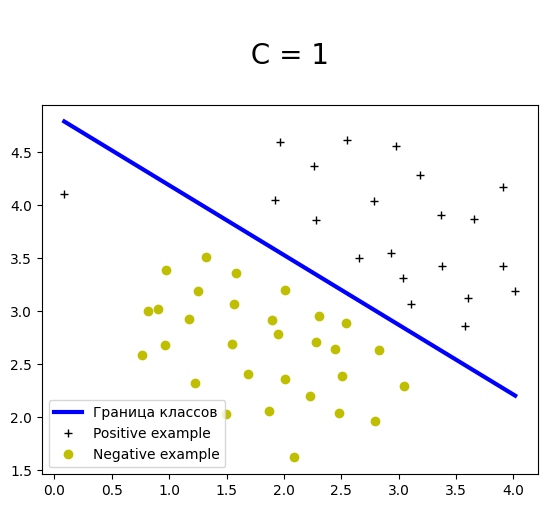

[LibSVM]...............*.......*
optimization finished, #iter = 1125
obj = -96.720237, rho = -53.130448
nSV = 3, nBSV = 0
Total nSV = 3


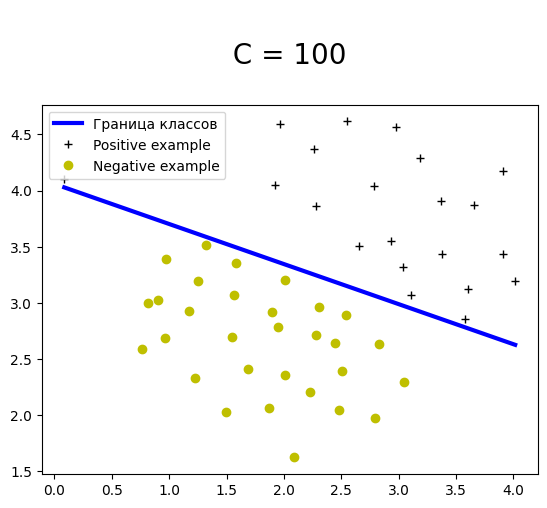

[LibSVM]...............*.......*
optimization finished, #iter = 1125
obj = -96.720237, rho = -53.130448
nSV = 3, nBSV = 0
Total nSV = 3


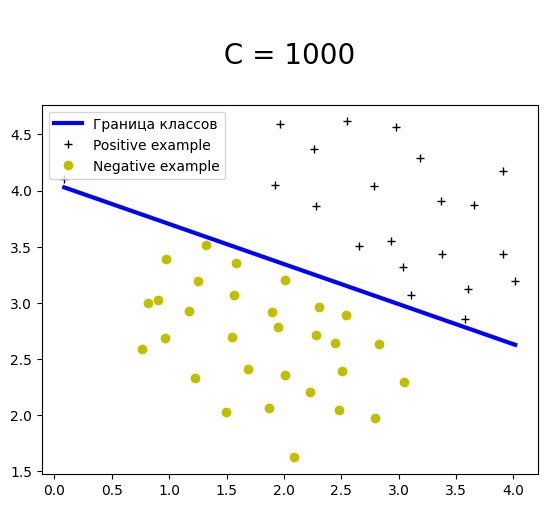

In [9]:
# Ваша задача в этой ячейке проанализировать как влияет параметр С на качество классификаци.
# Получить графики как на рисунках 2,3 и написать вывод.
C = [1, 100, 1000]
for c in C:
    model = svmTrain(X, y, c, "linear")
    visualizeBoundaryLinear(X, y, model, c)

## Часть 3: Применение радиальной базисной функции (ядра) Гаусса

В этой части упражнения демонстрируется применение метода опорных векторов для нелинейной классификации данных. В частности, предстоит применить SVM с ядром Гаусса в ситуации, когда линейное разделение невозможно.

Для нахождения нелинейных границ с помощью метода опорных векторов, необходимо запрограммировать функцию, реализующую применение ядра Гаусса. Под ядром Гаусса подразумевается функция, определяющая сходство пары образцов на основании оценки расстояния между ними $(х(i), х(j))$. Ядро Гаусса регулируется параметром $σ$, который определяет, насколько быстро уменьшается «схожесть» двух примеров при увеличении расстояния между ними.

Необходимую формулу для реализации функции gaussianKernel, Вы найдете в лабнике, в пункте $1.2.1$

In [10]:
def gaussianKernel(x1, x2, sigma):
    '''
    sim = gaussianKernel(x1, x2) Под ядром Гаусса подразумевается функция,
    определяющая сходство пары образцов на основании оценки расстояния между ними.
    Возвращаемой величиной является переменная sim
    
    Следует определить векторы x1 и x2 как векторы-столбцы
    '''
    # ====================== Ваш код здесь ======================
    # Указание: Запрограммируйте функцию, табулирующую близость векторов x1 и x2,
    # вычисляя значение ядра Гаусса, с параметром sigma
    sim = np.exp(-np.sum(np.square(x1 - x2)) / (2 * (sigma**2)))
    
    return sim

In [11]:
def gaussianKernelGramMatrix(X1, X2, sigma):
    gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            gram_matrix[i, j] = gaussianKernel(x1, x2, sigma)
    return gram_matrix

Как только вы закончите написание программы gaussianKernel.m, ноутбук проверит Вашу функцию нахождения ядра на 2-х представленных примерах, в ответе Вы должны будете увидеть следующее значение: 0.324652

In [12]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = gaussianKernel(x1, x2, sigma)

print("Gaussian Kernel between x1 =", x1, ", x2 =", x2, ", sigma =", sigma, ":\n{:f}".format(sim))

Gaussian Kernel between x1 = [1 2 1] , x2 = [ 0  4 -1] , sigma = 2 :
0.324652


## Часть 4: Визуализация обучающего набора 2

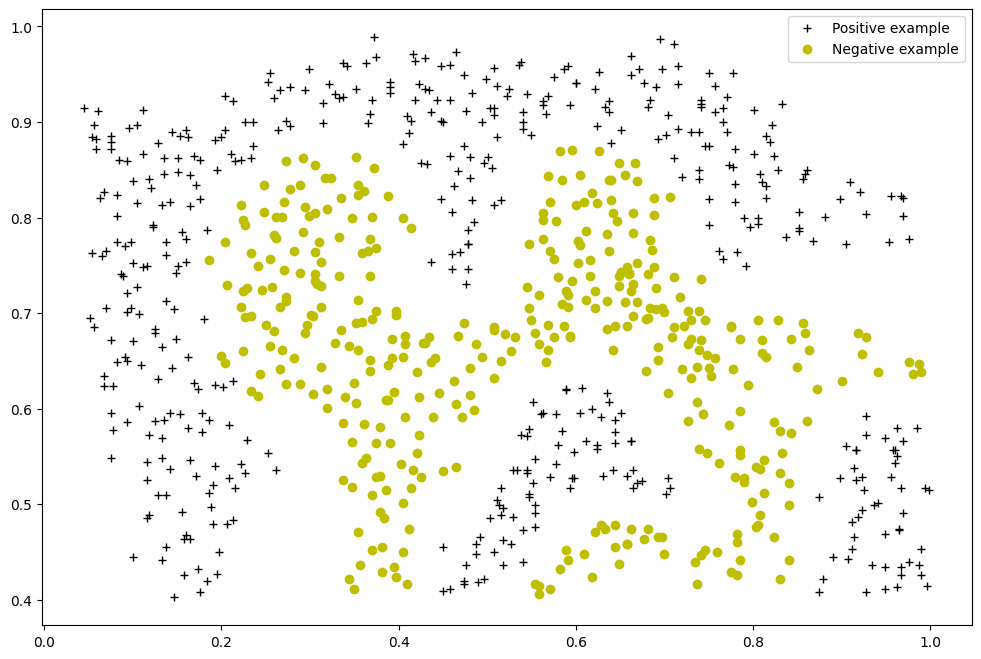

In [13]:
mat = scipy.io.loadmat('ex3data2.mat')
X = np.array(mat["X"])
y = np.array(mat["y"])

plt.figure(figsize=(12,8))
plotData(X, y)

## Часть 5: Обучение SVM с радиальной базисной функцией Гаусса (Набор данных 2)

Используя SVM с ядром Гаусса, построить нелинейную границу раздела, которая наиболее точно подойдет для классификации предоставленного набора данных.

Если Вы правильно написали программу расчета ядра Гаусса, ноутбук продолжит обучение алгоритма, используя 2-й набор данных. На графике (рис. 5) изображена граница раздела 2-х областей, найденная с помощью метода опорных векторов с ядром Гаусса.


In [30]:
def visualizeBoundary(X, y, model, sigma, varargin=0):
    x1plot = np.linspace(X[:,0].min(), X[:,0].max(), 100).T
    x2plot = np.linspace(X[:,1].min(), X[:,1].max(), 100).T
    X1, X2 = np.meshgrid(x1plot, x2plot)
    vals = np.zeros(X1.shape)
    for i in range(X1.shape[1]):
        this_X = np.column_stack((X1[:, i], X2[:, i]))
        vals[:, i] = model.predict(gaussianKernelGramMatrix(this_X, X, sigma))
    plt.contour(X1, X2, vals, colors="blue", levels=[0], linewidth=1)
    plotData(X,y)

[LibSVM]*
optimization finished, #iter = 284
obj = -111.413005, rho = 0.379666
nSV = 181, nBSV = 149
Total nSV = 181


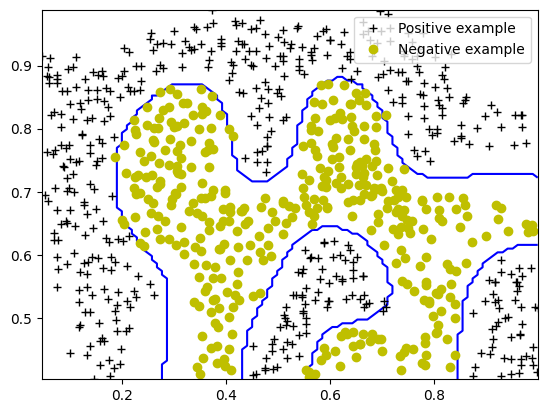

In [15]:
C = 1
sigma = 0.1

model = svmTrain(X, y, C, "gaussian_rbf", sigma)
visualizeBoundary(X, y, model, sigma)

## Часть 6: Визуализация обучающего набора 3

В этой части упражнения Вы усовершенствуете свои навыки по использованию метода опорных векторов с ядром Гаусса для проведения нелинейной классификации данных. Следующая часть ноутбука загрузит и отобразит график с набором данных для этой части упражнения

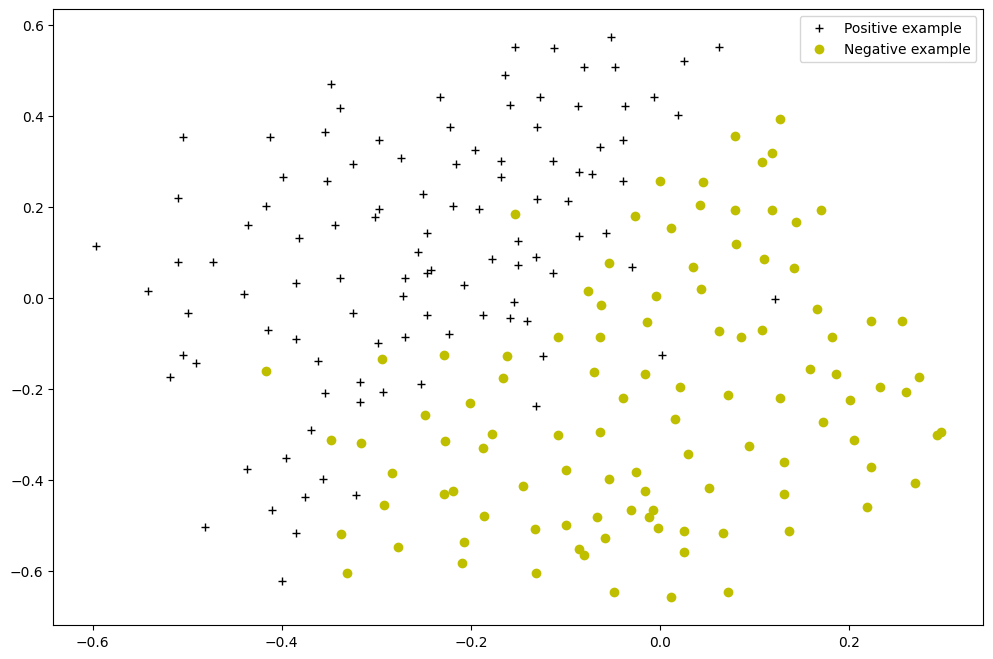

In [16]:
mat = scipy.io.loadmat('ex3data3.mat')
X = np.array(mat["X"])
y = np.array(mat["y"])

plt.figure(figsize=(12,8))
plotData(X, y)

In [47]:
def dataset3Params(X, y, Xval, yval):
    '''
    DATASET3PARAMS возвращает искомые параметры C и sigma для третьей части
    упражнения, в котором требуется определить оптимальные значения (C, sigma)
    для эффективного использования SVM с некоторой радиальной базисной функцией
    (например, c гауссовским ядром)

    Следует запрограммировать функцию, используя метод перекрестной проверки (кросс-валидация).

    Указание: Необходимо также рассчитать ошибку для набора данных, выбранных для проверки.
              Ошибка определяет долю примеров для перекрестной проверки, классифицированных
              неправильно.
    '''
    values = [0.01, 0.1, 0.3, 1, 10, 30]
    predictions = dict()
    for C in values:
        for sigma in values:
            model = svmTrain(X, y, C, 'gaussian_rbf', sigma, tol = 1e-5, max_passes = -1)
            prediction = model.predict(gaussianKernelGramMatrix(Xval, X, sigma))
            predictions[(C, sigma)] = np.mean((prediction != yval))
    C, sigma = min(predictions, key=predictions.get)
    
    return C, sigma

## Часть 7: Обучение SVM с радиальной базисной функцией Гаусса (Набор данных 3)

In [48]:
Xval = np.array(mat["Xval"])
yval = np.array(mat["yval"])

# Задание: Определить оптимальные параметры С и σ, используя метод перекрестной проверки с помощью множества Хval, yval.
C, sigma = dataset3Params(X, y, Xval, yval)
print("Best parameters are C={:.2f}, sigma={:.2f}".format(C, sigma))

[LibSVM]*
optimization finished, #iter = 112
obj = -2.090630, rho = 0.988184
nSV = 211, nBSV = 207
Total nSV = 211
[LibSVM]*
optimization finished, #iter = 114
obj = -2.017758, rho = 0.865708
nSV = 211, nBSV = 208
Total nSV = 211
[LibSVM]*
optimization finished, #iter = 105
obj = -1.895676, rho = 0.623848
nSV = 210, nBSV = 210
Total nSV = 210
[LibSVM]*
optimization finished, #iter = 106
obj = -1.905746, rho = 0.616772
nSV = 210, nBSV = 210
Total nSV = 210
[LibSVM]*
optimization finished, #iter = 106
obj = -1.915696, rho = 0.630263
nSV = 210, nBSV = 210
Total nSV = 210
[LibSVM]*
optimization finished, #iter = 106
obj = -1.915798, rho = 0.630401
nSV = 210, nBSV = 210
Total nSV = 210
[LibSVM]*
optimization finished, #iter = 114
obj = -20.063035, rho = 0.881839
nSV = 211, nBSV = 207
Total nSV = 211
[LibSVM]*.*
optimization finished, #iter = 223
obj = -13.186896, rho = 0.035544
nSV = 199, nBSV = 180
Total nSV = 199
[LibSVM]*
optimization finished, #iter = 131
obj = -10.114908, rho = 0.05054

In [49]:
model = svmTrain(X, y, C, "gaussian_rbf", sigma=sigma)
sigma

[LibSVM]*
optimization finished, #iter = 142
obj = -13.186892, rho = 0.035353
nSV = 199, nBSV = 180
Total nSV = 199


0.1

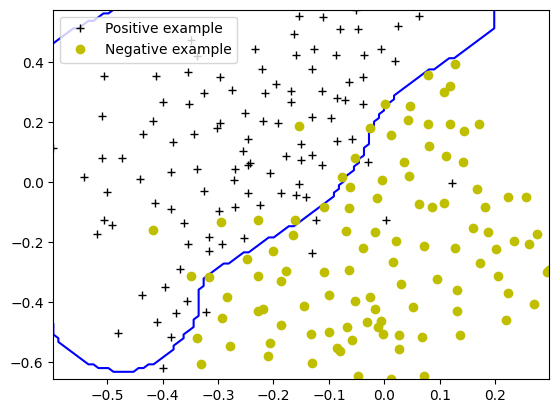

In [50]:
visualizeBoundary(X, y, model, sigma)